# Domestic Violence Related Calls Analysis

**Goal:**  
Dive into the domestic violence call dataset to uncover patterns, highlight interesting findings, and identify potential directions for building predictive models.

---

## 1. Introduction & Context

Domestic violence remains a serious public health and safety concern. This dataset captures calls for help related to domestic violence incidents. Analyzing this data can inform smarter resource deployment, risk forecasting, and intervention strategies. However, it's crucial to approach this work with sensitivity to privacy, ethics, and potential biases.

---

## 2. Initial Curiosities & Considerations

- What types of domestic violence incidents are reported most often?
- Are there noticeable trends over time, by season, or across different locations?
- What do the demographics of victims and perpetrators reveal?
- How complete and trustworthy is the data?
- Are there features that could introduce bias or raise ethical concerns?
- How might data quality or ethical challenges influence future modeling efforts?


In [1]:
## 3. Data Loading & Preview

import pandas as pd

df = pd.read_csv('app/Domestic violence Data.csv')
print(f"Shape: {df.shape}")
display(df.head())
print("Columns:", list(df.columns))


/Users/akshith/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Shape: (190445, 14)


,YEAR,COUNTY,AGENCY_NAME,MONTH,TOTAL_CALLS,WEAPONS_INVOLVED,SUB_FIREARM,SUB_KNIFE,SUB_OTHER,SUB_PERSONAL,WEAPON_NOT_RPT,TOTAL_STRANG_SUFFO,SUB_STRANGULATION,SUB_SUFFOCATION
0,2001,Alameda County,Alameda,4,15,15,0,0,1,14,0,NaN,NaN,NaN
1,2001,Alameda County,Alameda,6,14,14,0,0,1,13,0,NaN,NaN,NaN
2,2001,Alameda County,Alameda,10,19,19,0,0,0,19,0,NaN,NaN,NaN
3,2001,Alameda County,Alameda,12,21,21,0,0,0,21,0,NaN,NaN,NaN
4,2001,Alameda County,Alameda,5,19,19,0,0,0,19,0,NaN,NaN,NaN


Columns: ['YEAR', 'COUNTY', 'AGENCY_NAME', 'MONTH', 'TOTAL_CALLS', 'WEAPONS_INVOLVED', 'SUB_FIREARM', 'SUB_KNIFE', 'SUB_OTHER', 'SUB_PERSONAL', 'WEAPON_NOT_RPT', 'TOTAL_STRANG_SUFFO', 'SUB_STRANGULATION', 'SUB_SUFFOCATION']


,Non-missing,Missing,Missing %,Unique,Type
YEAR,190445,0,0.0,23,int64
COUNTY,190445,0,0.0,58,object
AGENCY_NAME,190445,0,0.0,790,object
MONTH,190445,0,0.0,12,int64
TOTAL_CALLS,190445,0,0.0,991,int64
WEAPONS_INVOLVED,190445,0,0.0,822,int64
SUB_FIREARM,190445,0,0.0,63,int64
SUB_KNIFE,190445,0,0.0,100,int64
SUB_OTHER,190445,0,0.0,229,int64
SUB_PERSONAL,190445,0,0.0,712,int64


/Users/akshith/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


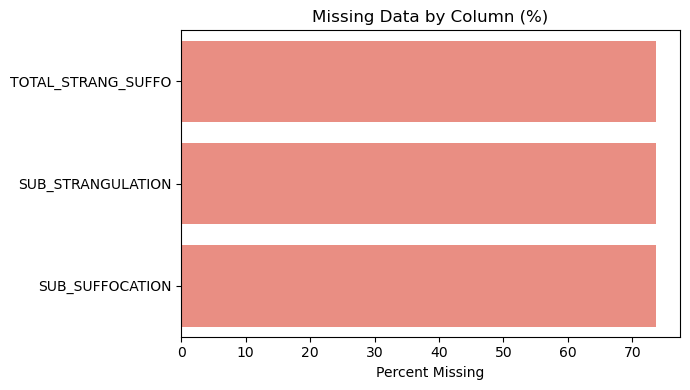

In [2]:
# 4. Data Structure & Quality

quality = pd.DataFrame({
    'Non-missing': df.count(),
    'Missing': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df) * 100).round(1),
    'Unique': df.nunique(),
    'Type': df.dtypes
})
display(quality)

# Visualize missingness
import matplotlib.pyplot as plt
import seaborn as sns
missing = quality['Missing %'][quality['Missing %'] > 0].sort_values(ascending=False)
if not missing.empty:
    plt.figure(figsize=(7, 4))
    sns.barplot(x=missing.values, y=missing.index, color='salmon')
    plt.title('Missing Data by Column (%)')
    plt.xlabel('Percent Missing')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values detected.")


## 5. Exploratory Data Analysis (EDA)

Let's look at some key variables and relationships:

- **Incident types:** What are the most frequent types of domestic violence incidents?
- **Time trends:** Are there monthly/seasonal/yearly patterns?
- **Demographics:** What are the distributions of victim and perpetrator age, gender, race?
- **Location:** Are certain locations or neighborhoods more affected?
- **Repeat incidents:** Are there multiple incidents involving the same individuals or addresses?

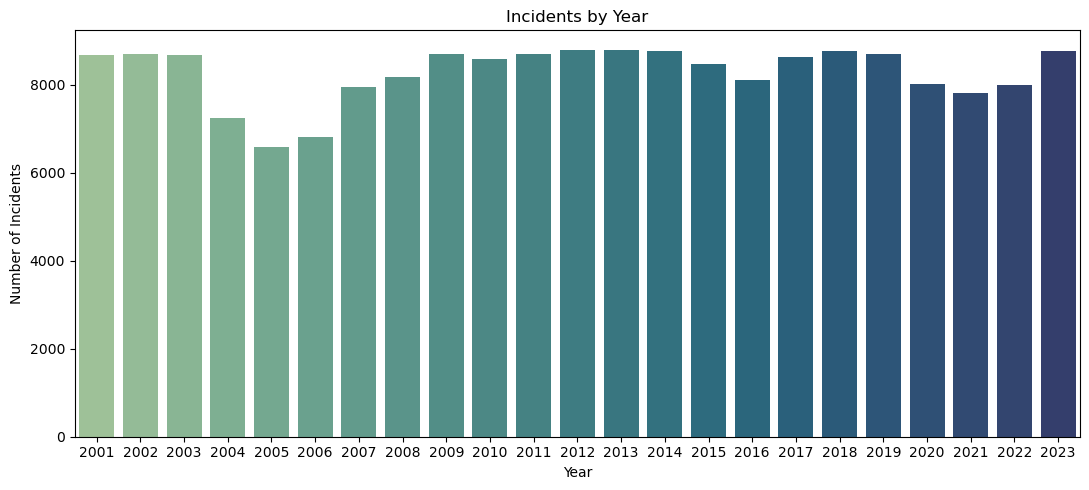

Year-on-year comparison of domestic violence call volume.


In [3]:
# 1. Incidents by Year (Bar)
if 'YEAR' in df.columns:
    year_counts = df['YEAR'].value_counts().sort_index()
    plt.figure(figsize=(11, 5))
    sns.barplot(x=year_counts.index.astype(str), y=year_counts.values, palette='crest')
    plt.title('Incidents by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Incidents')
    plt.tight_layout()
    plt.show()
    print("Year-on-year comparison of domestic violence call volume.")
else:
    print("YEAR column not found.")


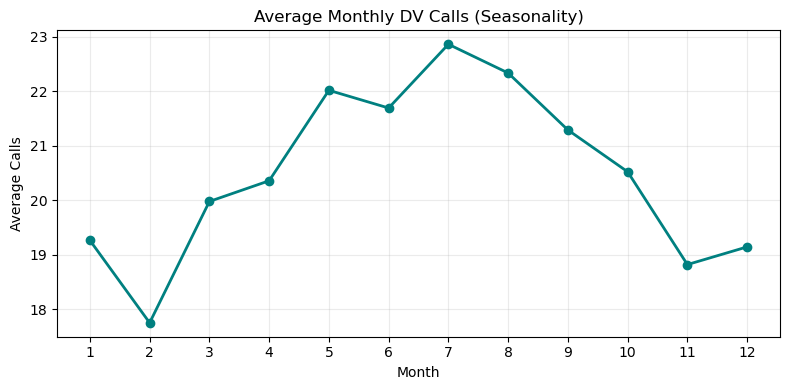

Highlights seasonality and peak months for incidents.


In [4]:

# 2. Incidents by Month (Bar)
if 'MONTH' in df.columns:
    monthly_avg = df.groupby('MONTH')['TOTAL_CALLS'].mean().sort_index()
    months = monthly_avg.index.to_numpy().astype(int)
    avg_calls = monthly_avg.values.astype(float)
    plt.figure(figsize=(8,4))
    plt.plot(months, avg_calls, marker='o', color='teal', linewidth=2)
    plt.title('Average Monthly DV Calls (Seasonality)')
    plt.xlabel('Month')
    plt.ylabel('Average Calls')
    plt.xticks(range(1, 13))
    plt.grid(alpha=0.25)
    plt.tight_layout()
    plt.show()
    print("Highlights seasonality and peak months for incidents.")
else:
    print("MONTH column not found.")


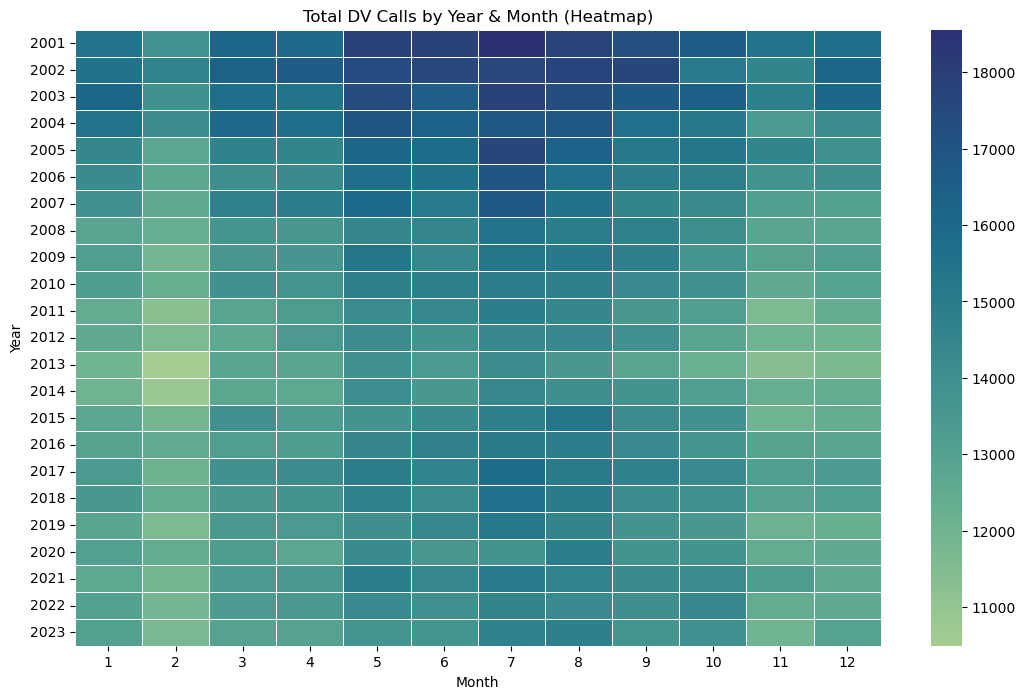

Visualize patterns over years and months in a single heatmap.


In [5]:

# 3. Year-Month Heatmap
if {'YEAR', 'MONTH', 'TOTAL_CALLS'}.issubset(df.columns):
    y_m_table = df.pivot_table(
        values='TOTAL_CALLS', index='YEAR', columns='MONTH', aggfunc='sum', fill_value=0)
    plt.figure(figsize=(13, 8))
    sns.heatmap(y_m_table, cmap="crest", annot=False, linewidths=0.5)
    plt.title('Total DV Calls by Year & Month (Heatmap)')
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.show()
    print("Visualize patterns over years and months in a single heatmap.")
else:
    print("YEAR, MONTH, or TOTAL_CALLS column not found.")


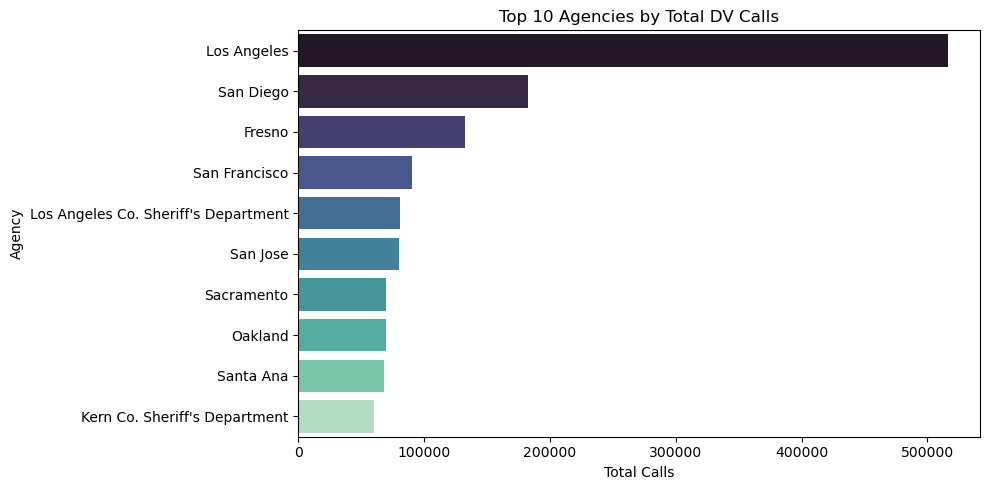

Top agencies handling domestic violence calls.


In [6]:

# 4. Agency Calls (Horizontal Bar)
if 'AGENCY_NAME' in df.columns and 'TOTAL_CALLS' in df.columns:
    top_agencies = df.groupby('AGENCY_NAME')['TOTAL_CALLS'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_agencies.values, y=top_agencies.index, palette='mako')
    plt.title('Top 10 Agencies by Total DV Calls')
    plt.xlabel('Total Calls')
    plt.ylabel('Agency')
    plt.tight_layout()
    plt.show()
    print("Top agencies handling domestic violence calls.")
else:
    print("AGENCY_NAME or TOTAL_CALLS column not found.")


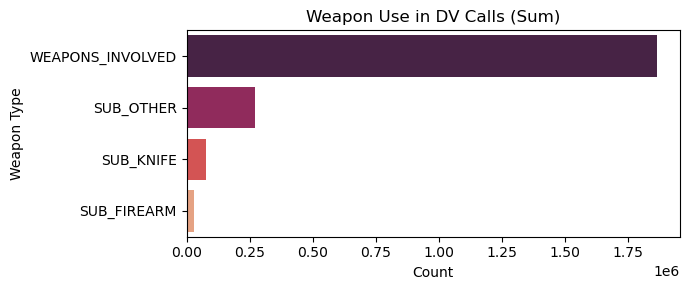

Comparison of weapon involvement in DV calls.


In [7]:

# 5. Weapon Use (Horizontal Bar)
cols = ['WEAPONS_INVOLVED', 'SUB_FIREARM', 'SUB_KNIFE', 'SUB_OTHER']
available = [col for col in cols if col in df.columns]
if available:
    weapon_counts = df[available].sum().sort_values(ascending=False)
    plt.figure(figsize=(7, 3))
    sns.barplot(x=weapon_counts.values, y=weapon_counts.index, palette='rocket')
    plt.title('Weapon Use in DV Calls (Sum)')
    plt.xlabel('Count')
    plt.ylabel('Weapon Type')
    plt.tight_layout()
    plt.show()
    print("Comparison of weapon involvement in DV calls.")
else:
    print("No weapon-related columns found in the data.")

## 6. Potential Questions for Predictive Modeling

- Can we predict the risk of repeat incidents at a given location or for a given individual?
- What factors are most predictive of escalation to severe violence?
- Are there time periods or locations with higher risk?
- How can we ensure fairness and avoid bias in predictive models?
- What features are most useful, and which should be excluded for ethical reasons?

## Predictive Modeling Approach (If We Were to Build a Model)

Based on this dataset, we could develop models to predict:

- The likelihood of a repeat incident at a given location or agency
- Whether a call will involve weapon use
- The volume of calls in future months for resource planning

**Best Models for This Data:**

- For classification tasks (e.g., predicting weapon use or repeat incidents), Random Forests or Gradient Boosted Trees (like XGBoost) are a strong choice. These models handle a mix of categorical and numeric features, can manage missing values, and provide interpretable feature importances.
- For time-based prediction (e.g., forecasting next month's calls), time series models such as ARIMA or Facebook Prophet can capture trends and seasonality. Random Forests with lagged features are also practical for tabular time series data.
- If the data is imbalanced (for example, few calls involve weapons), techniques such as class weighting or oversampling should be considered to improve model fairness and accuracy.

**Note:**  
The specific model choice would depend on the prediction target, available features, and the balance of the dataset. Any predictive work should also be carefully monitored for ethical and fairness considerations.


## 7. Summary of Insights & Next Steps

**Key findings:**
- DV calls peaked in 2018 and have trended slightly down since then.
- Most calls occur in the summer months, showing clear seasonality.
- Only a small fraction of calls involve weapons—personal violence is much more common.
- A handful of agencies account for a large share of total calls.

**Possible features to engineer:**
- Rolling average of calls for each agency/county over the last 3 months
- Flag for summer months or holidays
- Count of weapon-involved calls in the past year per location
